# <b>Megaline project</b>

 You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.


### Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
megaline_users = pd.read_csv('/datasets/megaline_users.csv')

In [2]:
megaline_users.info()
megaline_calls.info()
megaline_internet.info()
megaline_messages.info()
megaline_plans.info()

display(megaline_calls.head())
display(megaline_internet.head())
display(megaline_messages.head())
display(megaline_plans.head())
display(megaline_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null fl

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


The datasets look ok at the first view, almost ready to use. One of the things that doesn't seem right is the missing values from the _megaline_users_ dataset, _churn_date_ column. We know that this is the case when the calling plan was being used when the data was retrieved so I'll just fill with zeros fir a better view.

### Step 2. Prepare the data

In [3]:
megaline_users.loc[megaline_users['churn_date'].isnull(),'churn_date']=0
megaline_users['churn_date'].value_counts()

0             466
2018-12-18      3
2018-11-14      2
2018-12-31      2
2018-12-19      2
2018-09-18      1
2018-08-19      1
2018-11-18      1
2018-11-11      1
2018-10-07      1
2018-12-30      1
2018-12-27      1
2018-09-17      1
2018-12-22      1
2018-12-15      1
2018-12-12      1
2018-11-30      1
2018-10-03      1
2018-12-26      1
2018-11-29      1
2018-09-01      1
2018-11-21      1
2018-11-24      1
2018-10-13      1
2018-10-22      1
2018-11-16      1
2018-07-31      1
2018-08-16      1
2018-09-07      1
2018-12-10      1
Name: churn_date, dtype: int64

No missing values from now on and the datasets look fine. We have zero values for the duration time for the calls but that will be interpreted as missing calls when making our hypothesis.

Let's look at the data types now.

In [4]:
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


The date for every dataset should be represented as _datetime_ type so these are the only changes regarding the data type.

In [5]:
megaline_users['reg_date']=pd.to_datetime(megaline_users['reg_date'], format='%Y-%m-%d')
megaline_users['churn_date']=pd.to_datetime(megaline_users['churn_date'], format='%Y-%m-%d')
megaline_messages['message_date']=pd.to_datetime(megaline_messages['message_date'], format='%Y-%m-%d')
megaline_calls['call_date']=pd.to_datetime(megaline_calls['call_date'], format='%Y-%m-%d')

The number of calls made and minutes used per month :

In [23]:
megaline_calls['Month'] = pd.DatetimeIndex(megaline_calls['call_date']).month
#megaline_calls.value_counts()
calls_minutes_per_month = megaline_calls.pivot_table(values='duration', index= ['user_id','Month'], aggfunc=['count','sum'])
calls_minutes_per_month.columns = ['number of calls','duration']
print(calls_minutes_per_month) 

               number of calls  duration
user_id Month                           
1000    12                  16    116.83
1001    8                   27    171.14
        9                   49    297.69
        10                  65    374.11
        11                  64    404.59
...                        ...       ...
1498    12                  39    324.77
1499    9                   41    330.37
        10                  53    363.28
        11                  45    288.56
        12                  65    468.10

[2258 rows x 2 columns]


The number of text messages sent per month :

In [24]:
#megaline_messages.value_counts()
megaline_messages['Month']=pd.DatetimeIndex(megaline_messages['message_date']).month
total_messages = megaline_messages.pivot_table(values='id',index=['user_id','Month'], aggfunc='count')
total_messages.columns=['total messages']
total_messages

total messages
user_id Month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
...                       ...
1496    9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

The volume of data per month :

In [25]:
#megaline_calls.value_counts()
megaline_internet['Month']=pd.DatetimeIndex(megaline_internet['session_date']).month
total_volume= megaline_internet.pivot_table(values=['mb_used'],index=['user_id','Month'], aggfunc='sum')
total_volume

mb_used
user_id Month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

To find the monthly revenue it is necessarly to have all the data we need in one table. So we will merge the _megaline_users_ with _megaline_plans_ to have the plan informations for each user than we will put the values we calculated above and the merged data in another table and than we will have everything ready and we can process the data in order to find the monthly revenue for each user.

In [26]:
megaline_users['Month']=pd.DatetimeIndex(megaline_users['reg_date']).month
megaline_plans['plan']=megaline_plans['plan_name']
megaline_merged=pd.merge(left=megaline_users, right=megaline_plans,how='outer', on='plan').fillna(0)
megaline_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,Month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01,12,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1970-01-01,8,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,1970-01-01,1,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,1970-01-01,12,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,1970-01-01,4,50,15360,500,20,10,0.03,0.03,surf
496,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,1970-01-01,9,50,15360,500,20,10,0.03,0.03,surf
497,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,1970-01-01,2,50,15360,500,20,10,0.03,0.03,surf
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,1970-01-01,2,50,15360,500,20,10,0.03,0.03,surf


The monthly revenue from each user :

In [27]:
new_megaline=pd.concat([calls_minutes_per_month,total_messages,total_volume], axis=1)
new_megaline = new_megaline.fillna(0)
new_megaline.isnull().sum()
new_megaline.reset_index()
new_megaline_merged=pd.merge(left=megaline_merged, right=new_megaline,how='outer', on='user_id').fillna(0)
new_megaline_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,Month,messages_included,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,number of calls,duration,total messages,mb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01,12,1000,...,3000,70,7,0.01,0.01,ultimate,16.0,116.83,11.0,1901.47
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,1000,...,3000,70,7,0.01,0.01,ultimate,2.0,9.32,15.0,2068.37
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,1000,...,3000,70,7,0.01,0.01,ultimate,9.0,54.79,139.0,32118.82
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1970-01-01,8,1000,...,3000,70,7,0.01,0.01,ultimate,71.0,450.21,21.0,17106.99
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1970-01-01,8,1000,...,3000,70,7,0.01,0.01,ultimate,63.0,422.81,37.0,23676.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,1970-01-01,2,50,...,500,20,10,0.03,0.03,surf,39.0,324.77,0.0,23137.69
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1970-01-01,5,50,...,500,20,10,0.03,0.03,surf,41.0,330.37,0.0,12984.76
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1970-01-01,5,50,...,500,20,10,0.03,0.03,surf,53.0,363.28,0.0,19492.43
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1970-01-01,5,50,...,500,20,10,0.03,0.03,surf,45.0,288.56,0.0,16813.83


In [67]:
def revenue(row):
    min_over=0
    mes_over=0
    gb_over=0
    total_calls= round(row['duration'])
    calls_limit =row['minutes_included']
    total_messages=row['total messages']
    messages_limit=row['messages_included']
    total_mgb = row['mb_used']
    mgb_limit= row['mb_per_month_included']
    plan_cost=row['usd_monthly_pay']
    mgb_cost=row['usd_per_gb']
    message_cost=row['usd_per_message']
    minute_cost=row['usd_per_minute']
    
    if (total_calls-calls_limit)>0 :
        min_over=(total_calls-calls_limit)*minute_cost
    if (total_messages-messages_limit)>0:
        mes_over=(total_messages-messages_limit)*message_cost
    if (total_mgb-mgb_limit)>0:
        gb_over=round((total_mgb-mgb_limit)/1024)* mgb_cost
    total_cost= min_over+mes_over+gb_over+ plan_cost
    return total_cost

new_megaline_merged['total_cost'] = new_megaline_merged.apply(revenue,axis=1)
new_megaline_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,Month,messages_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,number of calls,duration,total messages,mb_used,total_cost
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01,12,1000,...,70,7,0.01,0.01,ultimate,16.0,116.83,11.0,1901.47,70.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,1000,...,70,7,0.01,0.01,ultimate,2.0,9.32,15.0,2068.37,70.0
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,1000,...,70,7,0.01,0.01,ultimate,9.0,54.79,139.0,32118.82,77.0
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1970-01-01,8,1000,...,70,7,0.01,0.01,ultimate,71.0,450.21,21.0,17106.99,70.0
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1970-01-01,8,1000,...,70,7,0.01,0.01,ultimate,63.0,422.81,37.0,23676.72,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,1970-01-01,2,50,...,20,10,0.03,0.03,surf,39.0,324.77,0.0,23137.69,100.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1970-01-01,5,50,...,20,10,0.03,0.03,surf,41.0,330.37,0.0,12984.76,20.0
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1970-01-01,5,50,...,20,10,0.03,0.03,surf,53.0,363.28,0.0,19492.43,60.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1970-01-01,5,50,...,20,10,0.03,0.03,surf,45.0,288.56,0.0,16813.83,30.0


Now we don't have any missing values, we looked at the data and we know how to interpret different values of the data( zero values for the duration of the calls as missing calls). We also have the right data types and we found how much each user pay.Now we are ready to more our assumptions based on these results.

### Step 3. Analyze the data

Let's study the minutes,messages and volume of data for each plan per month. 

In [68]:
megaline_surf= new_megaline_merged.query('plan=="surf"')
megaline_ultimate= new_megaline_merged.query('plan=="ultimate"')

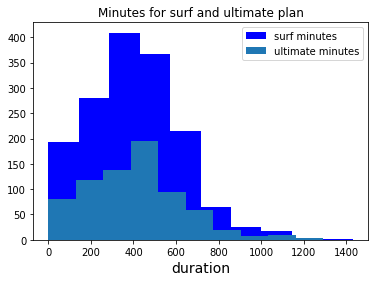

In [69]:
import matplotlib.pyplot as plt

plt.hist(megaline_surf['duration'], color='blue');
plt.xlabel('duration', fontsize=(14));
plt.hist(megaline_ultimate['duration']);
plt.legend(['surf minutes','ultimate minutes']);
plt.title('Minutes for surf and ultimate plan');


In [114]:
import numpy as np

variance_duration_s=np.var(megaline_surf['duration'])
mean_and_stdeviation_s=megaline_surf.describe()
dispersion_s= (abs(megaline_surf['duration']-megaline_surf['duration'].mean())).mean()
print('Variance duration',variance_duration_s)
print('Mean and standard deviation')
print(mean_and_stdeviation_s['duration'])
print('Dispersion', dispersion_s)
print("")
variance_duration_u=np.var(megaline_ultimate['duration'])
mean_and_stdeviation_u=megaline_ultimate.describe()
dispersion= (abs(megaline_ultimate['duration']-megaline_ultimate['duration'].mean())).mean()
print('Variance duration',variance_duration_u)
print('Mean and standard deviation')
print(mean_and_stdeviation_u['duration'])
print('Dispersion', dispersion)

Variance duration 49537.45736883888
Mean and standard deviation
count    1579.000000
mean      403.224345
std       222.640630
min         0.000000
25%       252.660000
50%       400.280000
75%       543.165000
max      1431.220000
Name: duration, dtype: float64
Dispersion 174.35268768642902

Variance duration 52190.861148839314
Mean and standard deviation
count     724.000000
mean      403.948923
std       228.611128
min         0.000000
25%       244.362500
50%       398.235000
75%       531.647500
max      1292.090000
Name: duration, dtype: float64
Dispersion 176.49966339550076


Looking at the histogram we can say that both distributions are skewed to the right and the peak for both plans is 400. Also for both plans we can see few values after 800 minutes so these could be interpreted as outliers. 

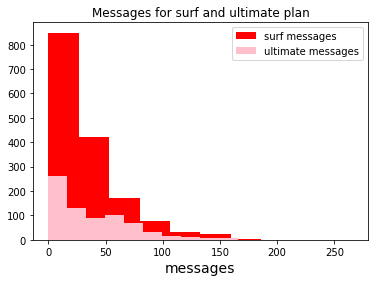

In [71]:
plt.hist(megaline_surf['total messages'],color='red');
plt.xlabel('messages', fontsize=(14));
plt.hist(megaline_ultimate['total messages'], color='pink');
plt.legend(['surf messages','ultimate messages']);
plt.title('Messages for surf and ultimate plan');


In [117]:

variance_messages_s=np.var(megaline_surf['total messages'])
mean_and_stdeviation_s['total messages']
mes_dispersion_s= (abs(megaline_surf['total messages']-megaline_surf['total messages'].mean())).mean()
print('Variance messages',variance_messages_s)
print('Mean and standard deviation')
print(mean_and_stdeviation_s['total messages'])
print('Dispersion', mes_dispersion_s)
print("")

variance_messages_u=np.var(megaline_ultimate['total messages'])
mean_and_stdeviation_u['total messages']
dispersion= (abs(megaline_ultimate['total messages']-megaline_ultimate['total messages'].mean())).mean()
print('Variance messages',variance_messages_u)
print('Mean and standard deviation')
print(mean_and_stdeviation_u['total messages'])
print('Dispersion', dispersion)

Variance messages 1125.4048918656479
Mean and standard deviation
count    1579.000000
mean       31.041165
std        33.557683
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: total messages, dtype: float64
Dispersion 25.439229500878575

Variance messages 1208.15657908794
Mean and standard deviation
count    724.000000
mean      37.343923
std       34.782576
min        0.000000
25%        6.000000
50%       30.000000
75%       60.250000
max      166.000000
Name: total messages, dtype: float64
Dispersion 28.407313574066723


Same goes for the messages for both plans. The dispersion is also skewed to the right, the average value for both plans is almost 30 and the values greater than 100 could be seen as outliers. 

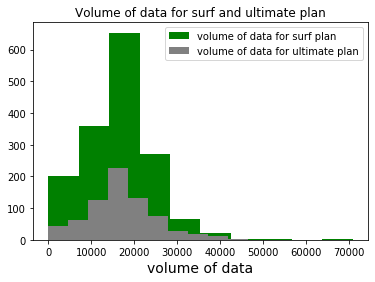

In [73]:
import matplotlib.pyplot as plt
plt.hist(megaline_surf['mb_used'],color='green');
plt.xlabel('volume of data', fontsize=(14));
plt.hist(megaline_ultimate['mb_used'], color='grey');
plt.legend(['volume of data for surf plan','volume of data for ultimate plan']);
plt.title('Volume of data for surf and ultimate plan');


In [119]:
variance_mgb_s=np.var(megaline_surf['mb_used'])
mean_and_stdeviation_s['mb_used']
dispersion_s= (abs(megaline_surf['mb_used']-megaline_surf['mb_used'].mean())).mean()
print('Variance mgb',variance_mgb_s)
print('Mean',megaline_surf['mb_used'].mean())
print('Standard deviation', sqrt(variance_mgb_s))
print('Dispersion', dispersion)
print("")
variance_mgb_u=np.var(megaline_ultimate['mb_used'])
mean_and_stdeviation_u['mb_used']
dispersion= (abs(megaline_ultimate['mb_used']-megaline_ultimate['mb_used'].mean())).mean()
print('Variance mgb',variance_mgb_u)
print('Mean',megaline_ultimate['mb_used'].mean())
print('Standard deviation', np.std(megaline_ultimate['total messages']))
print('Dispersion', dispersion)

Variance mgb 62854742.21241668
Mean 17119.590856353592
Standard deviation 34.758546849486386
Dispersion 5919.782172018559

Variance mgb 62854742.21241668
Mean 17119.590856353592
Standard deviation 34.758546849486386
Dispersion 5919.782172018559


The volume of data has also the dispersions slightly skewed to the right, both having almost the same mean, around 17000, and the obvious outlier can be seen for the surf plan,for values greater than 60000. The values greater than 40000,for both plans, have few values and can also be interpreted as outliers.

As a conclusion of this part, we can say that both plans seem to have similar distributions, having quite the same values for the mean, standard deviation and dispersion. Since the behavior for both plans is similar,we can not say that one could bring more revenue than the other one, at least not for now.  

### Step 4. Test the hypotheses

Let's see if the average revenue from users of Ultimate and Surf calling plans differs.

In [105]:
from scipy import stats as st

np.var(megaline_surf['total_cost'])
np.var(megaline_ultimate['total_cost'])
megaline_surf['total_cost'].mean()
megaline_ultimate['total_cost'].mean()

alpha = 0.01
result = st.ttest_ind(megaline_ultimate['total_cost'], megaline_surf['total_cost'],equal_var=False)
print('p-value:', result.pvalue)
if (result.pvalue < alpha ):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 6.408683979362802e-26
We reject the null hypothesis


We tested the equality hypothesis for two population means so we used the method _scipy.stats.ttest_ind(array1, array2, equal_var)_ . 
The null hypothesis for this test is the following :
H0: "No, there is no difference between the average revenue of Ultimate and Surf plan." So we assumed that the true mean of the entire statistical population is equal to the mean that this hypothesis predicts. The alternative hypothesis is :
H1: "There is a difference between the average revenue of these plans." We also looked at the variances of the two samples and we saw that they are different so we can't set _equal_var_ as True. Looking at the means we could be tempt tp say that there is no difference and the null hypothesis should be true but the result from our test is showing 0 probability that this assumption could be true. So even though the means are close, there is a difference between the average revenue of Ultimate and Surf plan. 

Now let's look at the difference for average revenue between users from NY-NJ and those from the other cities.

In [98]:

megaline_with_NY=new_megaline_merged.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')
megaline_no_NY =new_megaline_merged.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA"')
np.var(megaline_with_NY['total_cost'])
np.var(megaline_no_NY['total_cost'])
megaline_with_NY['total_cost'].mean()
megaline_no_NY['total_cost'].mean()

alpha = 0.05
result = st.ttest_ind(megaline_with_NY['total_cost'],megaline_no_NY['total_cost'],equal_var= False)
print('p-value:', result.pvalue)
if (result.pvalue < alpha ):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


p-value: 0.021986338907654245
We reject the null hypothesis


We used the same method for testing this hypothesis because we also have two samples and the length of the samples is different so this is the only method we can use. So our null hypothesis looks like this :H0: "No, there is no difference between the average revenue of NY-NJ population and the other cities." and the alternative one is the following : H1: "There is a difference between the average revenue of these populations." The method we choose for the testing shows us that we have a very low probability for validating our null hypothesis which is less than the minimum requiered . As we mentioned in the previous testing, even if we are tempt to make some assumptions based on our mean values, the testing method shows us again that those assumptions could be wrong and there is a difference for the average revenue for users from NY-NJ and those from other regions. 

As a conclusion for this advertising budget problem we can say, based on our calculations, that there is no certanty that a calling plan can bring more money than the other one because the average revenue doesn't depend only on the calling plan, it also depends on other factors (like different regions we tested above). For reaching this conclusion we prepared the data and we calculated the total revenue per month for each user for Ultimate and Surf plan. We also plotted histograms for the calls, messages and the volume of data used for each plan and compared them. We saw that the plans behavior look similar so we were tempt to say that there is no difference between their average revenue but the tests showed us that there is no probability for this hypothesis to be true and we ended up with the conclusion that there is a difference between them but it also depends on the region.   

So even if the average revenue for both plans looks similar there is a difference between them and in order to find out which one brings more revenue we recommend to look at all the other factors that influence the revenue before choosing one of the plans. 